# Task 2 - Prediction using Unsupervised ML

## Clustering using KMeans on Iris dataset
#### -By Kowsik Nandagopan D, Data Science and Business Analyst Intern at TSF

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement clustering functions.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Utility functions written in separate python file. (Will be available in repository)
from adspy_shared_utilities import *

### Data Preparation

In [3]:
# Loading dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop unwanted dataset
df.drop(["Id"], axis=1, inplace=True)

In [5]:
# Printing first five datapoints
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Dimension and unique classes of flowers
print("Dimension of dataset:", df.shape)
print("Species in dataset:", df.Species.unique())

Dimension of dataset: (150, 5)
Species in dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
# Number of null values
print("Number of Nan/Null data points:\n", df.isnull().sum())

Number of Nan/Null data points:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
# Feature variable. Here there will not be any target variable. Since, it is un-supervised machine learning
X = df.iloc[:, [0, 1, 2, 3]].values

### Training KMeans Model

In [9]:
# Import KMeans
from sklearn.cluster import KMeans

#### Evaluation

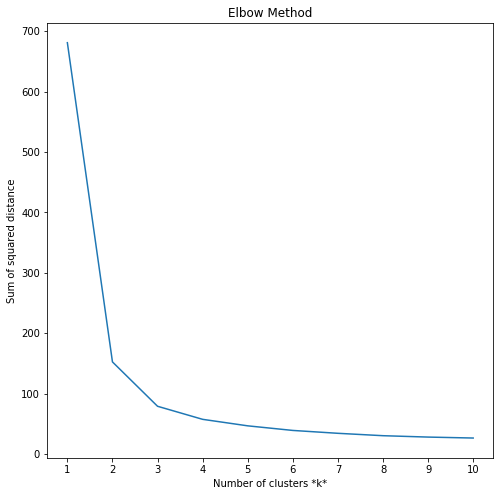

In [10]:
# Using "Elbow method" to calculate best number for clustering
sse = [] # Sum of squared distances
max_cluster = 10 # Maximum number of clusters
for i in range(1, max_cluster+1):
    model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300) # Most of them are default setting
    model.fit(X)
    sse.append(model.inertia_) # Inertia is the Sum of the squared distance

plt.figure(figsize=(8, 8))
plt.plot(np.arange(1, max_cluster+1, 1), sse)
plt.xticks(np.arange(1, max_cluster+1, 1.0))
plt.title("Elbow Method")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

From the "Elbow method" discribed above we can see that `3` will be optimum value for clustering
**Using other methods to evaluate**.

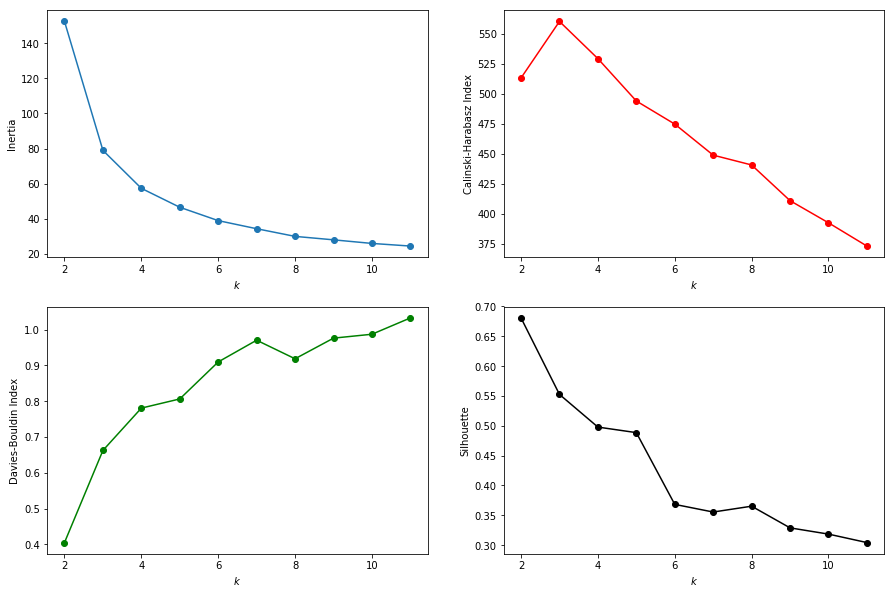

In [11]:
# Displaying the results of the internal validation criteria
res = cluster_range(X, KMeans(random_state=42), 2, 11)
plot_internal(res['inertias'], res['chs'], res['dbi'], res['scs'])
plt.show()

From all the graphs we see that 3 will be optimum value

#### Training

In [12]:
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
model.fit(X)
y_kmeans = model.predict(X)

#### Visualization

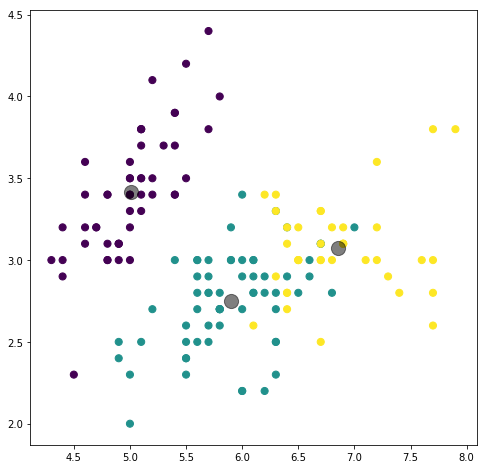

In [13]:
# Just to display how good clustering is done. Black dots are the centroids of clustering
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label="Centers")
plt.show()

From above plot we see that clustering is not so perfect there is a overlapping region

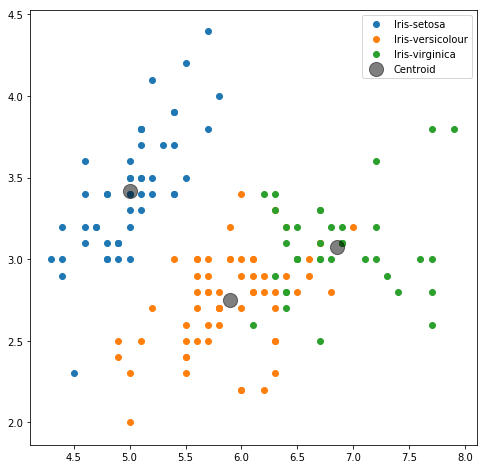

In [15]:
# Visualising the clusters - Sepal length vs sepal width
plt.figure(figsize=(8, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            c='black', s=200, alpha=0.5, label="Centroid");

plt.legend();

### PCA Analysis and Training

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
# Scaling to standard value since, pca values can change with different scales
scaler = StandardScaler()
# Let the PCA components be 2. Can be any value less than or equal to number of attributes.
pca = PCA(n_components=3)

In [26]:
Xs = scaler.fit_transform(X)

In [27]:
Xpca = pca.fit_transform(Xs)

#### Evaluating

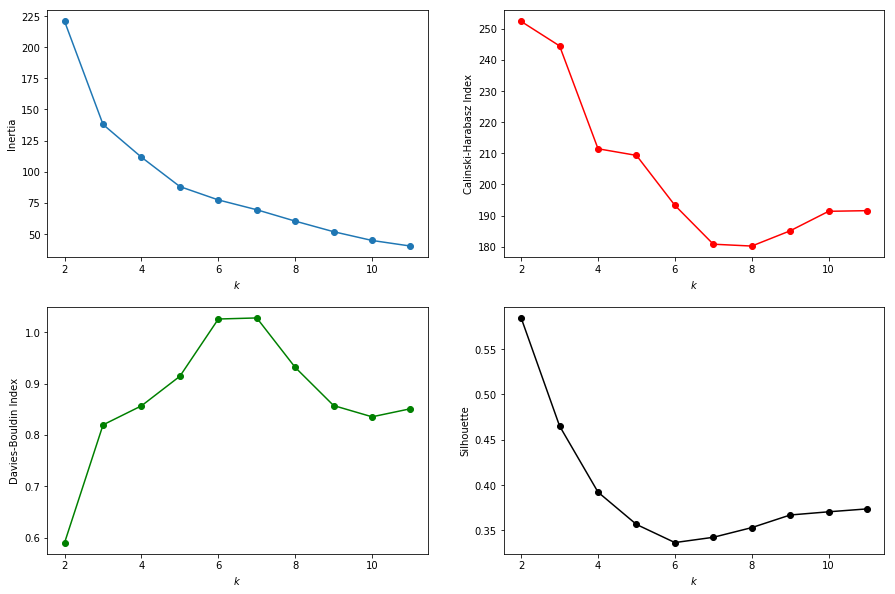

In [28]:
# Displaying the results of the internal validation criteria
res = cluster_range(Xpca, KMeans(random_state=42), 2, 11)
plot_internal(res['inertias'], res['chs'], res['dbi'], res['scs'])
plt.show()

#### Training and visualizing

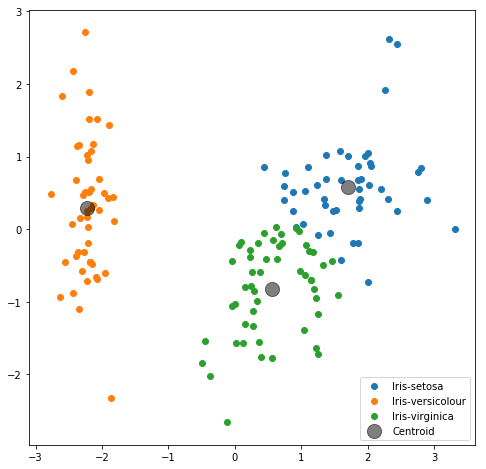

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000)
kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)
# Visualising the clusters - Sepal length vs sepal width
plt.figure(figsize=(8, 8))
plt.scatter(Xpca[y_kmeans == 0, 0], Xpca[y_kmeans == 0, 1], 
            label = 'Iris-setosa')
plt.scatter(Xpca[y_kmeans == 1, 0], Xpca[y_kmeans == 1, 1], 
            label = 'Iris-versicolour')
plt.scatter(Xpca[y_kmeans == 2, 0], Xpca[y_kmeans == 2, 1],
            label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            c='black', s=200, alpha=0.5, label="Centroid");

plt.legend();

We see that our dataset is somewhat more separated than before. Our model is more correctly clustering Versicolor and non-versicolor. There may be error in prediction when we use KMeans to classify Sentosa and Virginica

### Saving Model 

In [31]:
import joblib

In [32]:
joblib.dump(kmeans, 'iris-clustering-model.joblib')
joblib.dump(scaler, 'iris-clustering-scaler.joblib')
joblib.dump(pca, 'iris-clustering-pca.joblib')

['iris-clustering-pca.joblib']